<a href="https://colab.research.google.com/github/Ubaldo-Yareli/M-todos-numericos/blob/main/Polinomio_Interpolante_de_Newton_con_Sympy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dada una tabla de datos con dos colúmnas (inicialmente), donde la primera colúmna contiene los valores de $x$ y en la otra los datos $(y=F(x))$ de evaluar dichos puntos en la función.

Al tener la tabla inicial con dos colúmnas, se crea un tercera que se denomina $Δy$ ó $Δ^1y$ la cual, es hecha con las diferencias que existen entre los valores de la colúmna $y=F(x)$.


Posteiormente se encuentra $Δ^2y$, que son las diferencias entre los valores de $Δ^1y$.


Se reallizan los mismos pasos hasta que las diferencias sean iguales, en este caso, en $Δ^3y$ se tienen dichas diferencias, por lo que se concluye que el polinomio es de grado $3$.


Se calculan los coeficientes binomiales, donde se necesitan los valores de:
$h=$Distancia e los valores de la colúmna $x$ de la tabla.

$Xk=$El valor del que se quiere encontrar $y=F(x)$

$X0=$El valor menor más cercano a $xk$

Con dichos valores, se puede encontrar el valor de $K$, con la fórmula $K=\frac{(Xk-X_0)}{h}$, valor que se utilizará para encontrar los coeficientes binomiales.

Los coeficientes binomiales se encuentran con $\binom{k}{j}=\frac{(k)(k-1)(k-2)...(k-(j+1))}{j!}$, con $j$ iniciando en 1.

Para entontrar el plinomio, se utiliza $P_n(x)=f(x_0)+Δ^1f(x_0)(x-x_0)+Δ^2f(x_0)(x-x_0)(x-x_1)+...+Δ^nf(x_0)(x-x_0)(x-x_1)...(x-x_{n-1})$ y (en el ejemplo usado) se evalúa en $f(1.5)$

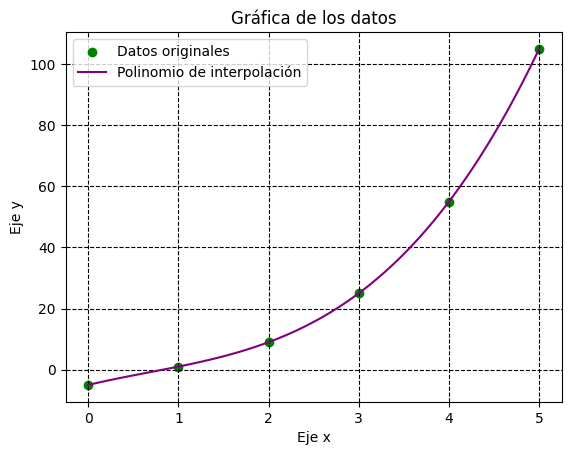

El polinomio de interpolación es:
 3      2          
x  - 2⋅x  + 7⋅x - 5

El valor de f(1.5) es: 4.37500000000000


In [22]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Datos de la tabla
X=np.array([0, 1, 2, 3, 4, 5]) #Valores de "x"
F=np.array([-5, 1, 9, 25, 55, 105]) #Valores de y=F(x)


#Definir el símbolo
x=sp.symbols('x')

#Cálculo de diferencias con numpy
delta1=np.diff(F)
delta2=np.diff(delta1)
delta3=np.diff(delta2)
delta4=np.diff(delta3)

#Selección de punto para interpolar
xk=1.5
x0=X[0]

#Calcular h y k
h=X[1]-X[0] #Suponemos que los puntos tienen diferencias constantes
k=(xk-x0)/h

#Inicializar el polinomio de interpolación con f(x0)
polinomio=F[0]

#Definir el término simbólico para los productos
term=1

#Iteración para sumar los términos al polinomio
for n in range(1, len(F)):
    term*=(x-X[0]-(n-1)*h)
    coef_binomial=term/sp.factorial(n) #Factorial de n

    if n==1:
        polinomio+=coef_binomial*delta1[0]
    elif n==2:
        polinomio+=coef_binomial*delta2[0]
    elif n==3:
        polinomio+=coef_binomial*delta3[0]
    elif n==4:
        polinomio+=coef_binomial*delta4[0]

plt.scatter(X, F, color="green", marker='o', label='Datos originales') #Gráfica de la tabla
plt.title("Gráfica de los datos")
plt.xlabel("Eje x")
plt.ylabel("Eje y")
plt.grid(color="black", linestyle="--")

polinomio_simplificado=sp.simplify(polinomio)
polinomio_numerico=sp.lambdify(x, polinomio_simplificado, "numpy")
x_vals=np.linspace(min(X), max(X), 100) #Grafica del polinomio
y_vals=polinomio_numerico(x_vals)
plt.plot(x_vals, y_vals, label='Polinomio de interpolación', color='purple')
plt.legend()
plt.show()

print("El polinomio de interpolación es:") #Imprime el polinomio sin evaluar
sp.pprint(polinomio_simplificado)
polinomio_evaluado=polinomio_simplificado.subs(x, xk)
print(f"\nEl valor de f({xk}) es: {polinomio_evaluado}")